In [2]:
import os
import numpy as np

import pandas as pd
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates

from sklearn.cluster import AgglomerativeClustering

import seaborn as sns

#matplotlib and related imports
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.patches import Patch
import matplotlib.patches as patches

from scipy.spatial import ConvexHull
from scipy.signal import find_peaks
from scipy.stats import sem
import scipy.cluster.hierarchy as shc

#import squarify

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as stattools
from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil.parser import parse

from IPython.display import Image

import geopandas
import folium
from folium.plugins import TimeSliderChoropleth
from branca.element import Template, MacroElement

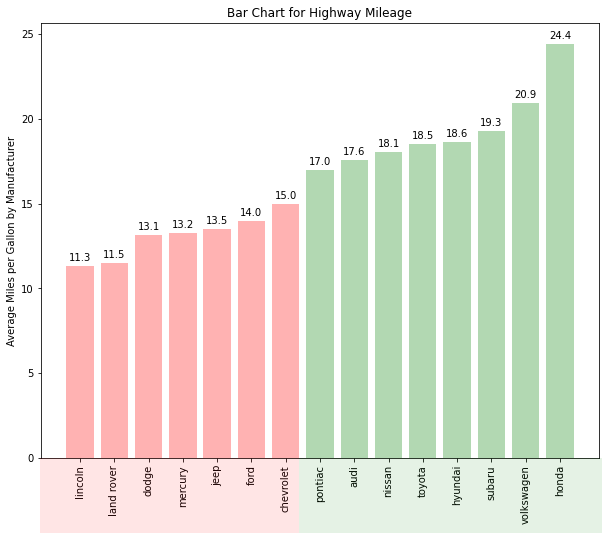

In [3]:
# get the data
path = "./data/mpg_ggplot2.csv"
df = pd.read_csv(path)

# prepare the data for plotting
# groupby and create the target x and y
gb_df = df.groupby(["manufacturer"])["cyl", "displ", "cty"].mean()
gb_df.sort_values("cty", inplace = True)
# fitler x and y
x = gb_df.index
y = gb_df["cty"]

# instanciate the figure
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()

# plot the data
for x_, y_ in zip(x, y):
    # this is very cool, since we can pass a function to matplotlib
    # and it will plot the color based on the result of the evaluation
    ax.bar(x_, y_, color = "red" if y_ < y.mean() else "green", alpha = 0.3)
    
     # add some text
    ax.text(x_, y_ + 0.3, round(y_, 1), horizontalalignment = 'center')

# red one
p2 = patches.Rectangle((.124, -0.005), width = .360, height = .13, alpha = .1, facecolor = 'red', transform = fig.transFigure)
fig.add_artist(p2)

# green one
p1 = patches.Rectangle((.124 + .360, -0.005), width = .42, height = .13, alpha = .1, facecolor = 'green', transform = fig.transFigure)
fig.add_artist(p1)

# rotate the x ticks 90 degrees
ax.set_xticklabels(x, rotation=90)

# add an y label
ax.set_ylabel("Average Miles per Gallon by Manufacturer")

# set a title
ax.set_title("Bar Chart for Highway Mileage");

Text(0.5, 1.0, 'Scatter plot with regression')

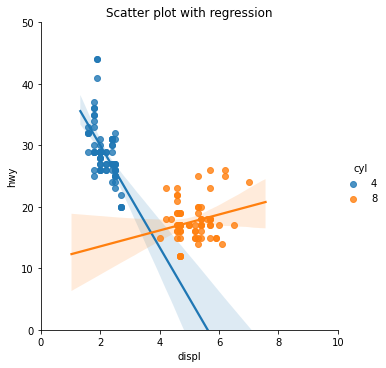

In [4]:
# prepare the data for plotting
# filter only 2 clases to separate it more easily on the plot
df = df[df["cyl"].isin([4,8])]

# plot the data using seaborn
sns.lmplot("displ", "hwy", df, hue = "cyl")

# prettify the plot

# since we are using seaborn and this library uses matplotlib behind the scenes
# you can call plt.gca (get current axes) and use all the familiar matplotlib commands
ax = plt.gca()

# change the upper limit of the plot to make it more pleasant
ax.set_xlim(0, 10)
ax.set_ylim(0, 50)

# set title
ax.set_title("Scatter plot with regression")

Text(0.5, 1.0, 'Jitter plot')

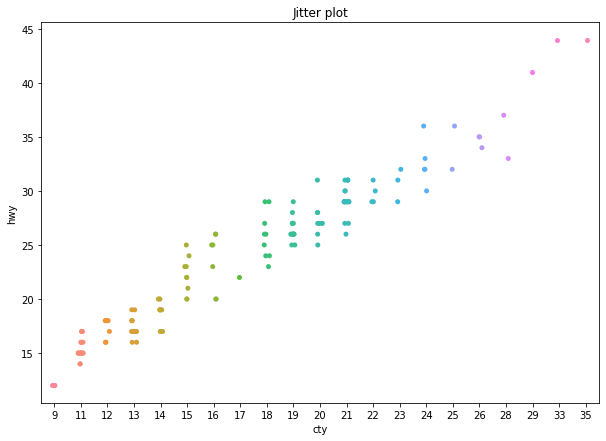

In [5]:
# separate x and y variables
x = df["cty"]
y = df["hwy"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
plt.figure(figsize = (10, 7))

# ----------------------------------------------------------------------------------------------------
# plot the data using seaborn
ax = sns.stripplot(x, y)

# ----------------------------------------------------------------------------------------------------
# prettify the plot

# set title
ax.set_title("Jitter plot")

Text(0.5, 1.0, 'Count plot')

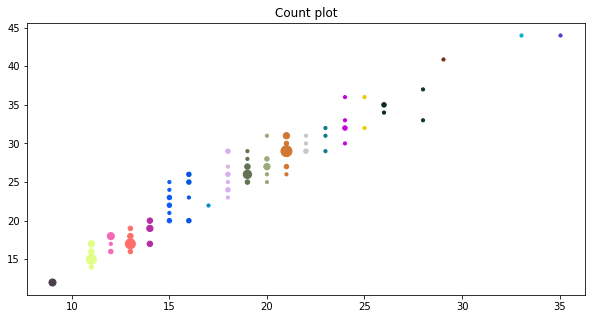

In [6]:
# make a groupby by variables of interest
gb_df = df.groupby(["cty", "hwy"]).size().reset_index(name = "counts") 

# sort the values
gb_df.sort_values(["cty", "hwy", "counts"], ascending = True, inplace = True)

colors = {i:np.random.random(3,) for i in sorted(list(gb_df["cty"].unique()))}

# instanciate the figure
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

# iterate over each category and plot the data. This way, every group has it's own color and sizwe.
for x in sorted(list(gb_df["cty"].unique())):
    
    # get x and y values for each group
    x_values = gb_df[gb_df["cty"] == x]["cty"]
    y_values = gb_df[gb_df["cty"] == x]["hwy"]
    
    # extract the size of each group to plot
    size = gb_df[gb_df["cty"] == x]["counts"]
    
    # extract the color for each group and covert it from rgb to hex
    color = matplotlib.colors.rgb2hex(colors[x])
    
    # plot the data
    ax.scatter(x_values, y_values, s = size*10, c = color)
    
# set title
ax.set_title("Count plot")

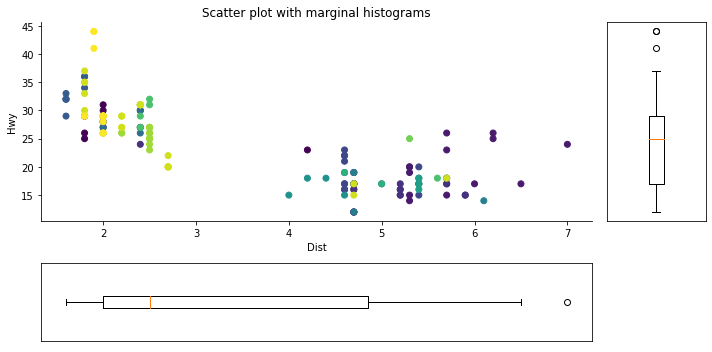

In [7]:
# prepare the data for plotting
x = df["displ"]
y = df["hwy"]

# in this plot we create the colors separatly
colors = df["manufacturer"].astype("category").cat.codes

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 5))
# in this case we use gridspec.
# check the basics section of this kernel if you need help.
gs = fig.add_gridspec(6, 6)
ax1 = fig.add_subplot(gs[:4, :-1])

# ----------------------------------------------------------------------------------------------------
# plot the data

# main axis: scatter plot
# this line is very nice c = df.manufacturer.astype('category').cat.codes
# since it basically generate a color for each category
ax1.scatter(x, y, c = df.manufacturer.astype('category').cat.codes) 

# set the labels for x and y
ax1.set_xlabel("Dist")
ax1.set_ylabel("Hwy")

# set the title for the main plot
ax1.set_title("Scatter plot with marginal histograms")

# prettify the plot
# get rid of some of the spines to make the plot nicer
ax1.spines["right"].set_color("None")
ax1.spines["top"].set_color("None")

# using familiar slicing, get the left axes and plot
ax2 = fig.add_subplot(gs[4:, :-1])
ax2.boxplot(x, 
            vert = False,  
            whis = 0.75 # make the boxplot lines shorter
           )
# prettify the plot
# set the ticks to null
ax2.set_xticks([])
ax2.set_yticks([])

# left plot
ax3 = fig.add_subplot(gs[:4, -1])
ax3.boxplot(y,  
            whis = 0.75 # make the boxplot lines shorter
           )
# prettify the plot
# set the ticks to null
ax3.set_xticks([])
ax3.set_yticks([])

# make all the figures look nicier
fig.tight_layout()